<a href="https://colab.research.google.com/github/arzss-code/jobsheet-machine-learning/blob/main/Traditional_Machine_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dengan menggunakan pengetahuan yang Anda dapatkan pada sesi kali ini, analisalah kasus-kasus berikut dan bandingkan hasil antar-algoritma:
1. Kasus Regresi: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking
2. Kasus Klasifikasi: https://www.kaggle.com/datasets/deepu1109/star-dataset

Pastikan Anda membaca dan pahami baik-baik masing-masing _link_ mengenai deskripsi dari dataset yang akan Anda olah tersebut.

# Regresi

Data setelah proses wrangling:
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
Simple Linear Regression -> MSE: 125.25, RMSE: 11.19, MAE: 8.90, R²: 0.58, MAPE: 34.69%
Multiple Linear Regression -> MSE: 125.25, RMSE: 11.19, MAE: 8.90, R²: 0.58, MAPE: 34.69%
Polynomial Regression -> MSE: 69.02, RMSE: 8.31, MAE: 6.22, R²: 0.77, 

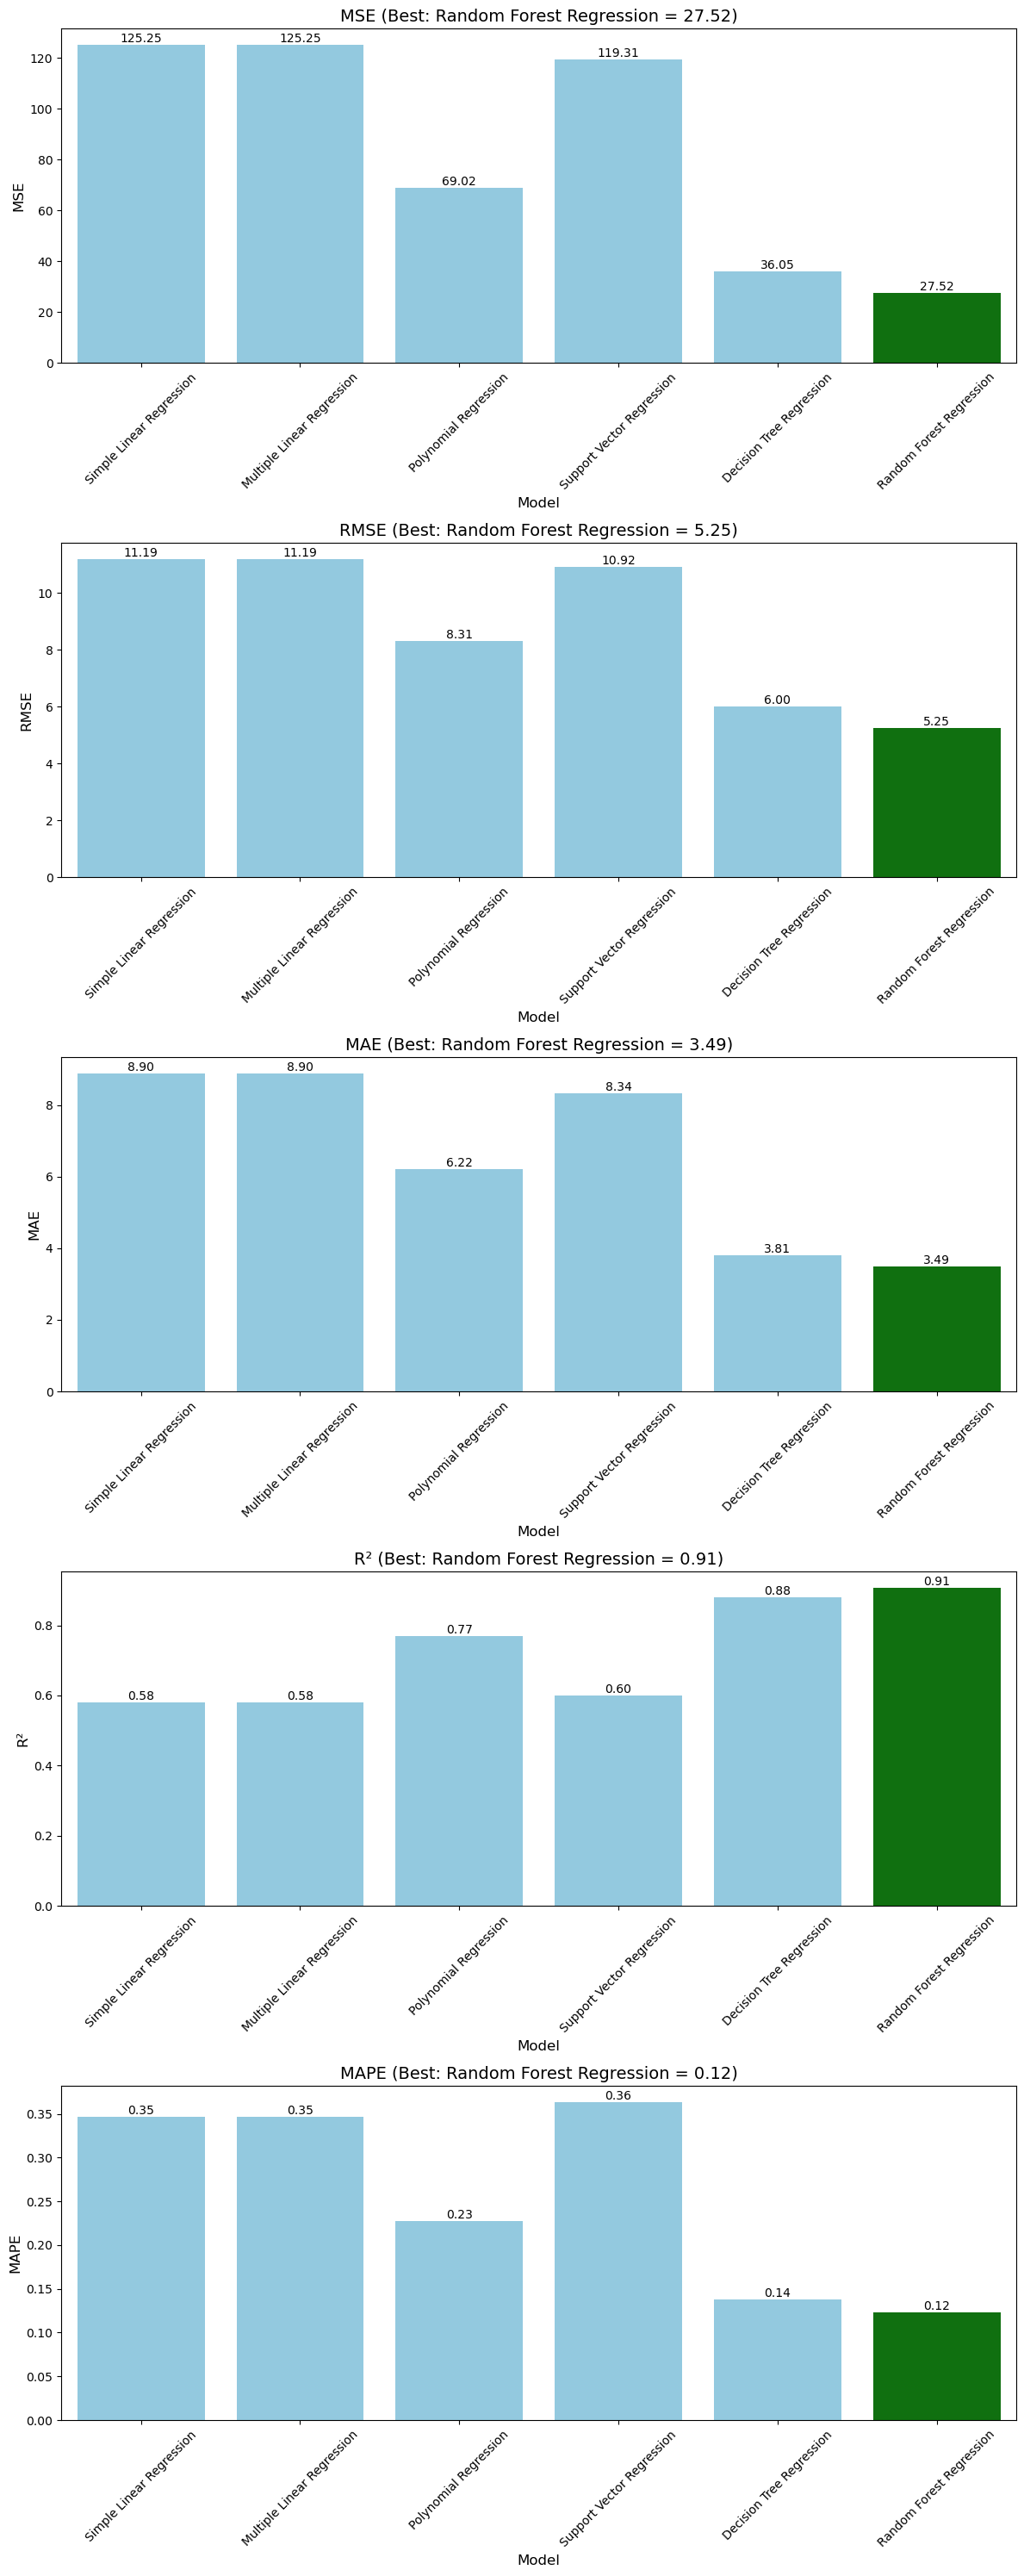

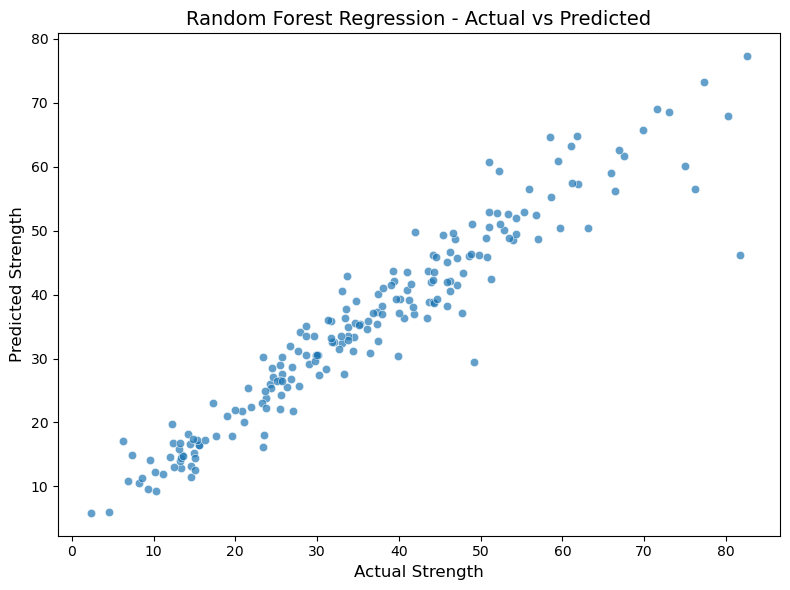

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# 1. Pemuatan Data & Data Wrangling
df = pd.read_csv("concrete_data.csv")

# Bersihkan nama kolom (hilangkan spasi ekstra)
df.columns = [col.strip() for col in df.columns]

# Hilangkan spasi ekstra di setiap nilai (jika kolom bertipe objek)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Konversi semua kolom ke tipe numeric jika memungkinkan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus duplikat dan baris dengan missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print("Data setelah proses wrangling:")
print(df.head())

# 2. Pisahkan fitur dan target
X = df.drop(columns=["Strength"])
y = df["Strength"]

# 3. Pembagian Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Pembuatan Model dan Pipeline
# Masing-masing pipeline menyertakan scaling (StandardScaler)
models = {
    "Simple Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Multiple Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Polynomial Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', LinearRegression())
    ]),
    "Support Vector Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR(kernel='rbf'))
    ]),
    "Decision Tree Regression": Pipeline([
        # Decision Tree tidak sensitif terhadap skala, jadi scaler tidak wajib
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    "Random Forest Regression": Pipeline([
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# 5. Evaluasi Model (menghitung MSE, RMSE, MAE, R², MAPE)
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2, "MAPE": mape}
    print(f"{name} -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}, MAPE: {mape:.2%}")

# Konversi hasil evaluasi ke DataFrame untuk visualisasi
results_df = pd.DataFrame(results).T

# Tentukan model terbaik untuk tiap metrik
# Untuk error (MSE, RMSE, MAE, MAPE) nilai terkecil lebih baik; untuk R² nilai tertinggi lebih baik.
metrics = ["MSE", "RMSE", "MAE", "R²", "MAPE"]
best_models = {}
for metric in metrics:
    if metric == "R²":
        best_value = results_df[metric].max()
        best_model = results_df[results_df[metric]==best_value].index[0]
    else:
        best_value = results_df[metric].min()
        best_model = results_df[results_df[metric]==best_value].index[0]
    best_models[metric] = (best_model, best_value)
    print(f"Best model for {metric}: {best_model} with {metric} = {best_value:.2f}")

# 6. Visualisasi untuk tiap metrik dengan label rapi dan tidak bertumpuk
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))
plt.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics):
    ax = axes[i]
    # Model terbaik diberi warna hijau, sisanya warna biru muda
    colors = ['green' if model == best_models[metric][0] else 'skyblue' for model in results_df.index]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette=colors)
    ax.set_title(f"{metric} (Best: {best_models[metric][0]} = {best_models[metric][1]:.2f})", fontsize=14)
    ax.set_xlabel("Model", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', labelrotation=45, labelsize=10)
    # Tambahkan label angka di atas tiap bar agar tidak bertumpuk
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# 7. Scatter Plot untuk model terbaik berdasarkan R²
best_model_name = best_models["R²"][0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.7)
plt.xlabel("Actual Strength", fontsize=12)
plt.ylabel("Predicted Strength", fontsize=12)
plt.title(f"{best_model_name} - Actual vs Predicted", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Klasifikasi

Data setelah wrangling:
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  

--- Training Logistic Regression ---
Best parameters for Logistic Regression: {'C': 10}
Logistic Regression Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
   

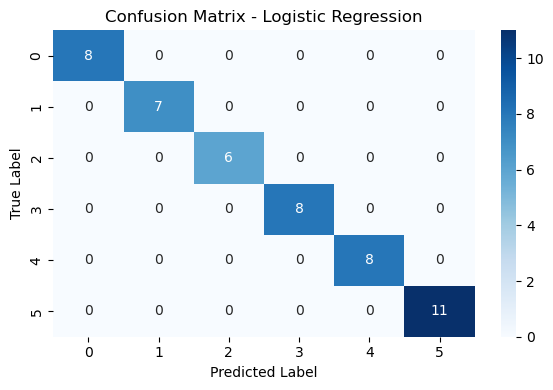


--- Training K-Nearest Neighbors ---
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3}
K-Nearest Neighbors Accuracy: 0.9583
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.89      1.00      0.94         8
           4       0.88      0.88      0.88         8
           5       1.00      0.91      0.95        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



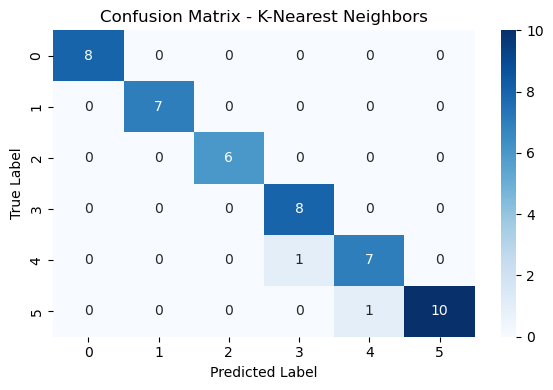


--- Training Support Vector Machine ---
Best parameters for Support Vector Machine: {'C': 10}
Support Vector Machine Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



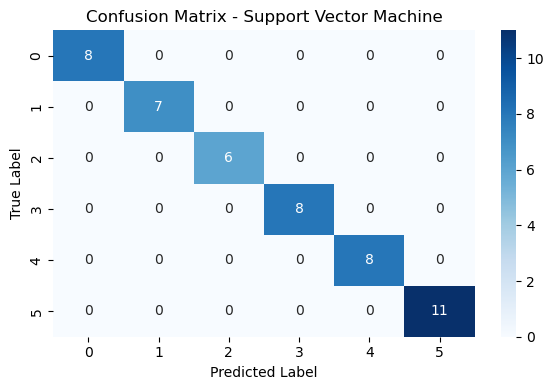


--- Training Kernel SVM ---
Best parameters for Kernel SVM: {'C': 10, 'gamma': 'scale'}
Kernel SVM Accuracy: 0.9792
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



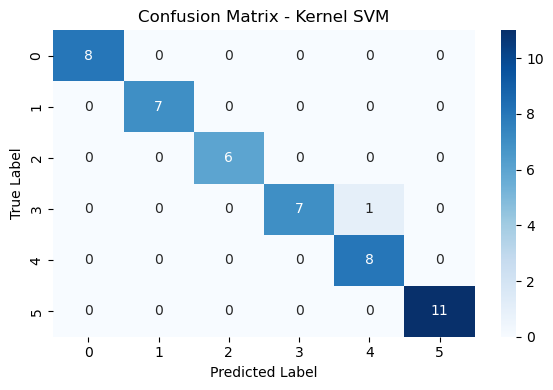


--- Training Naive Bayes ---
Naive Bayes Accuracy: 0.9583
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



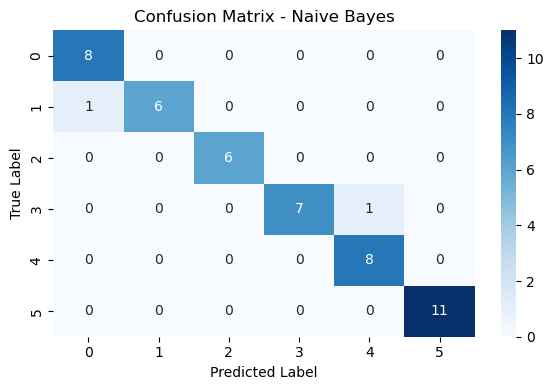


--- Training Decision Tree ---
Best parameters for Decision Tree: {'max_depth': None}
Decision Tree Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



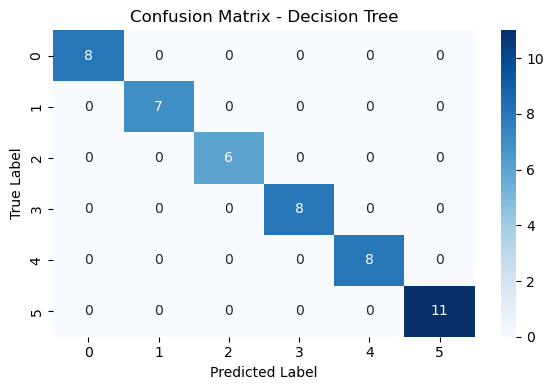


--- Training Random Forest ---
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Random Forest Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



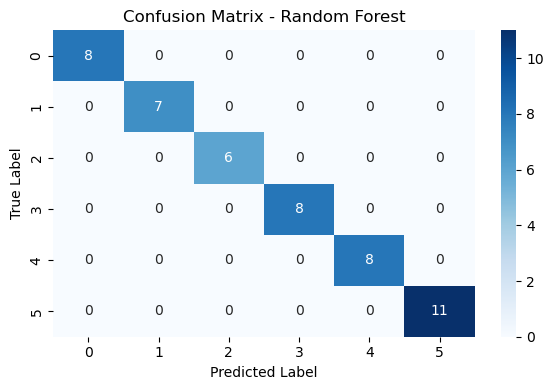

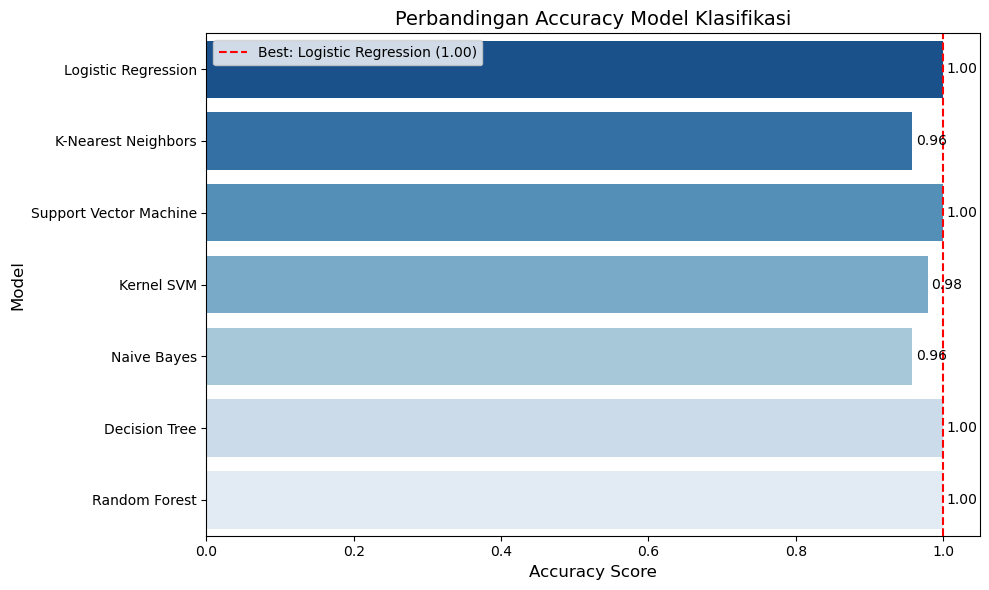

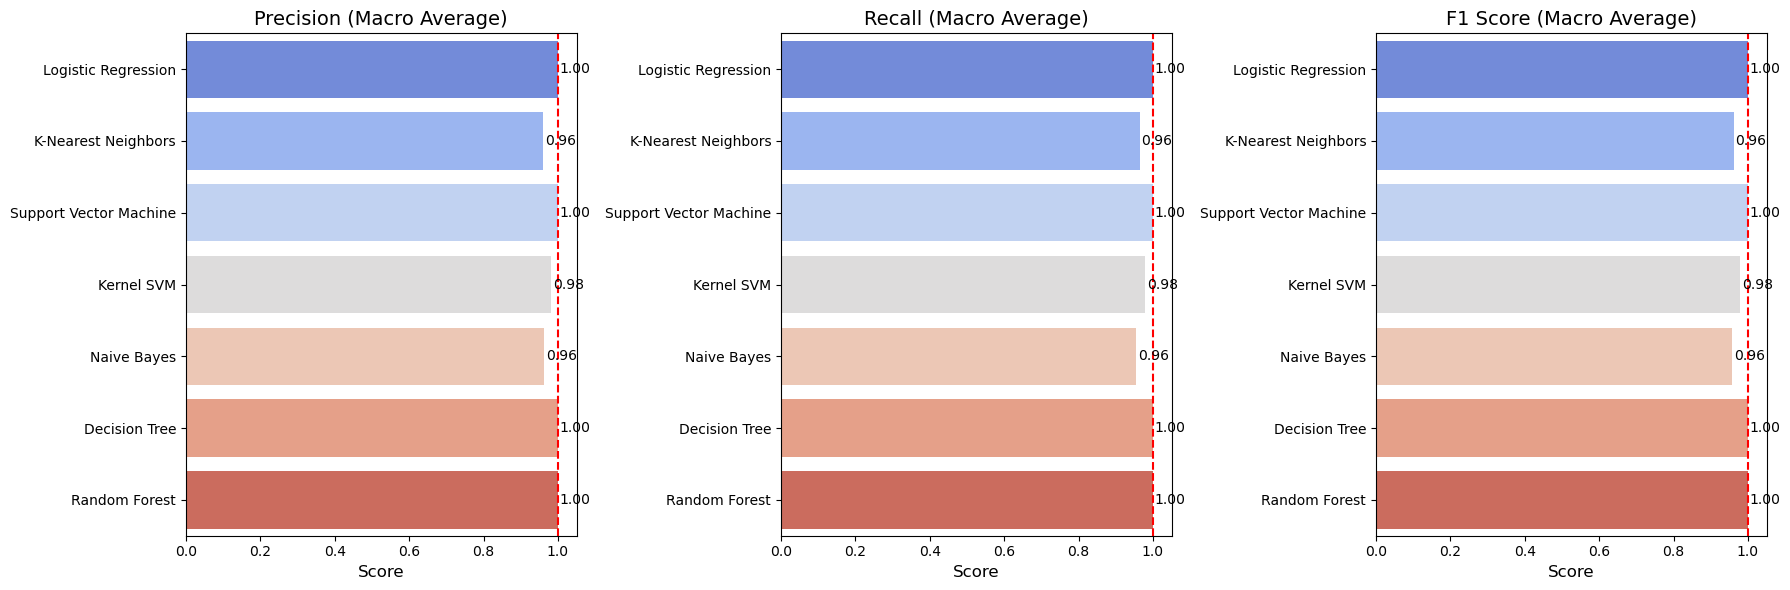


📌 Model terbaik berdasarkan akurasi tertinggi: Logistic Regression dengan akurasi 1.0000


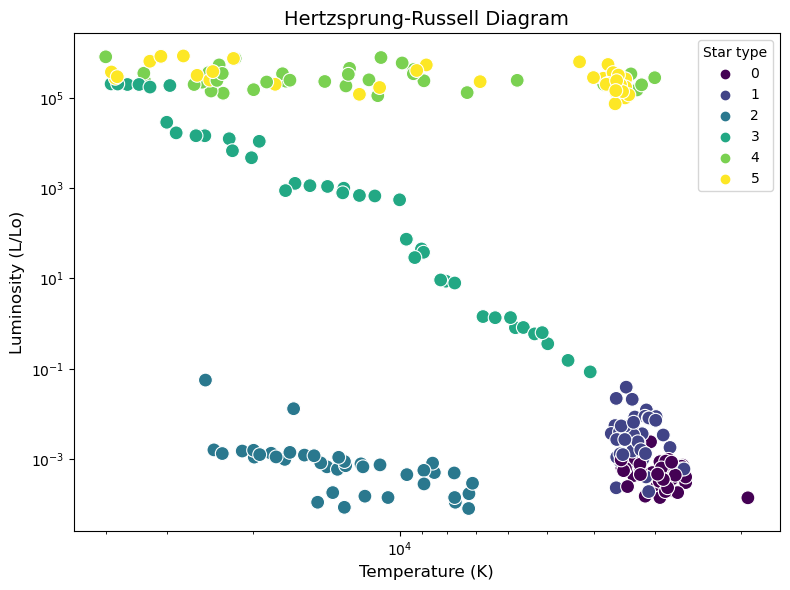

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score)

# 1. Pemuatan Data & Data Wrangling
# Baca dataset dari CSV
data = pd.read_csv("6 class csv.csv")
# Bersihkan nama kolom (hilangkan spasi ekstra)
data.columns = [col.strip() for col in data.columns]

# Bersihkan nilai pada kolom kategorikal
for col in ['Star color', 'Spectral Class']:
    data[col] = data[col].astype(str).str.strip()

# Konversi kolom numerik ke tipe numerik jika belum
num_cols = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Tangani missing values dan duplikat
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

print("Data setelah wrangling:")
print(data.head())

# 2. Preprocessing: Encoding dan Normalisasi
# Encode kolom kategorikal dengan one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Star color', 'Spectral Class'], drop_first=True)

# Normalisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# 3. Pembagian Data: Pisahkan fitur dan target
# Target adalah 'Star type'
X = data_encoded.drop(columns=["Star type"])
y = data_encoded["Star type"]

# Bagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Pembuatan Model Klasifikasi dengan Hyperparameter Tuning
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000),
                              {'C': [0.01, 0.1, 1, 10]}),
    "K-Nearest Neighbors": (KNeighborsClassifier(),
                            {'n_neighbors': [3, 5, 7]}),
    "Support Vector Machine": (SVC(kernel='linear'),
                               {'C': [0.1, 1, 10]}),
    "Kernel SVM": (SVC(kernel='rbf'),
                   {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
    "Naive Bayes": (GaussianNB(), {}),  # Tidak ada hyperparameter utama
    "Decision Tree": (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [None, 5, 10]}),
    "Random Forest": (RandomForestClassifier(random_state=42),
                      {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]})
}

results = {}  # Menyimpan metrik evaluasi tiap model

for model_name, (model, param_grid) in models.items():
    print(f"\n--- Training {model_name} ---")
    # Jika ada parameter untuk tuning, gunakan GridSearchCV
    if param_grid:
        grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best parameters for {model_name}: {grid.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    # Evaluasi model pada data testing
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    report = classification_report(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Classification Report": report,
        "Confusion Matrix": conf_mat
    }

    print(f"{model_name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report)

    # Visualisasi confusion matrix untuk model ini
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# 5. Visualisasi Perbandingan Semua Model Berdasarkan Metrik Evaluasi
model_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in model_names]
precision_scores = [results[model]['Precision'] for model in model_names]
recall_scores = [results[model]['Recall'] for model in model_names]
f1_scores = [results[model]['F1'] for model in model_names]

# Tentukan model terbaik berdasarkan accuracy tertinggi
best_model_index = np.argmax(accuracies)
best_model_name = model_names[best_model_index]

# Visualisasi Accuracy
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=accuracies, y=model_names, palette="Blues_r")
ax.axvline(x=max(accuracies), color="red", linestyle="--",
           label=f"Best: {best_model_name} ({max(accuracies):.2f})")
plt.xlabel("Accuracy Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Perbandingan Accuracy Model Klasifikasi", fontsize=14)
plt.legend()
for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f"{v:.2f}", color="black", va="center", fontsize=10)
plt.tight_layout()
plt.show()

# Visualisasi Precision, Recall, dan F1-Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Precision
ax1 = sns.barplot(x=precision_scores, y=model_names, palette="coolwarm", ax=axes[0])
ax1.set_title("Precision (Macro Average)", fontsize=14)
ax1.set_xlabel("Score", fontsize=12)
for i, v in enumerate(precision_scores):
    ax1.text(v + 0.005, i, f"{v:.2f}", color="black", va="center", fontsize=10)
ax1.axvline(x=max(precision_scores), color="red", linestyle="--")

# Recall
ax2 = sns.barplot(x=recall_scores, y=model_names, palette="coolwarm", ax=axes[1])
ax2.set_title("Recall (Macro Average)", fontsize=14)
ax2.set_xlabel("Score", fontsize=12)
for i, v in enumerate(recall_scores):
    ax2.text(v + 0.005, i, f"{v:.2f}", color="black", va="center", fontsize=10)
ax2.axvline(x=max(recall_scores), color="red", linestyle="--")

# F1 Score
ax3 = sns.barplot(x=f1_scores, y=model_names, palette="coolwarm", ax=axes[2])
ax3.set_title("F1 Score (Macro Average)", fontsize=14)
ax3.set_xlabel("Score", fontsize=12)
for i, v in enumerate(f1_scores):
    ax3.text(v + 0.005, i, f"{v:.2f}", color="black", va="center", fontsize=10)
ax3.axvline(x=max(f1_scores), color="red", linestyle="--")

plt.tight_layout()
plt.show()

print(f"\n📌 Model terbaik berdasarkan akurasi tertinggi: {best_model_name} dengan akurasi {max(accuracies):.4f}")

# 6. Visualisasi Data: HR Diagram
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data,
                x="Temperature (K)",
                y="Luminosity(L/Lo)",
                hue="Star type",
                palette="viridis",
                s=100)
plt.xscale("log")
plt.yscale("log")
plt.gca().invert_xaxis()  # Membalik sumbu x sesuai konvensi HR Diagram
plt.title("Hertzsprung-Russell Diagram", fontsize=14)
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("Luminosity (L/Lo)", fontsize=12)
plt.tight_layout()
plt.show()
